# Name : Pratik Sontakke
## College : Ajeenkya DY Patil University
## Task 1 : Google Stock Prediction using LSTM

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('GOOGLE.csv')
df

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044
...,...,...,...,...,...,...
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,183772044


In [5]:
df.tail()

,Date,Open,High,Low,Close,Volume
4712,2023-05-09,108.389999,110.150002,107.190002,107.349998,36360100
4713,2023-05-10,107.970001,112.940002,107.930000,111.750000,63153400
4714,2023-05-11,115.400002,117.919998,114.410004,116.570000,78900000
4715,2023-05-12,116.680000,118.029999,116.110001,117.510002,41073800
4716,2023-05-15,116.110001,118.480003,116.010002,116.510002,36226100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4717 non-null   object 
 1   Open    4717 non-null   float64
 2   High    4717 non-null   float64
 3   Low     4717 non-null   float64
 4   Close   4717 non-null   float64
 5   Volume  4717 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 221.2+ KB


In [7]:
ps = df[['Date', "Close"]] #we are going to require only two columns
ps

,Date,Close
0,2004-08-19,2.511011
1,2004-08-20,2.710460
2,2004-08-23,2.737738
3,2004-08-24,2.624374
4,2004-08-25,2.652653
...,...,...
4712,2023-05-09,107.349998
4713,2023-05-10,111.750000
4714,2023-05-11,116.570000
4715,2023-05-12,117.510002


In [8]:
ps['Date']

0       2004-08-19
1       2004-08-20
2       2004-08-23
3       2004-08-24
4       2004-08-25
           ...    
4712    2023-05-09
4713    2023-05-10
4714    2023-05-11
4715    2023-05-12
4716    2023-05-15
Name: Date, Length: 4717, dtype: object

In [9]:
#we are going to convert date from string(object) to date
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object  = str_to_datetime('2004-08-25')
datetime_object

datetime.datetime(2004, 8, 25, 0, 0)

In [12]:
ps['Date'] = ps['Date'].apply(str_to_datetime)
ps['Date']

0      2004-08-19
1      2004-08-20
2      2004-08-23
3      2004-08-24
4      2004-08-25
          ...    
4712   2023-05-09
4713   2023-05-10
4714   2023-05-11
4715   2023-05-12
4716   2023-05-15
Name: Date, Length: 4717, dtype: datetime64[ns]

In [13]:
ps.index = ps.pop('Date')

In [14]:
ps.head()

,Close
Date,
2004-08-19,2.511011
2004-08-20,2.710460
2004-08-23,2.737738
2004-08-24,2.624374
2004-08-25,2.652653


<AxesSubplot:xlabel='Date'>

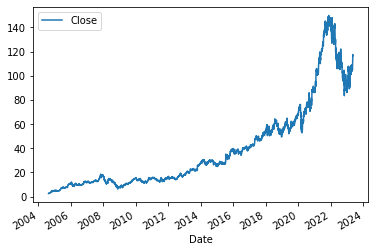

In [15]:
ps.plot()

In [16]:
def ps_to_windowed_ps(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    ps_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(ps_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = ps_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_ps = ps_to_windowed_ps(ps, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_ps

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,101.534500,102.066498,101.626503,101.623001
1,2021-03-26,102.066498,101.626503,101.623001,101.236504
2,2021-03-29,101.626503,101.623001,101.236504,102.289497
3,2021-03-30,101.623001,101.236504,102.289497,102.323502
4,2021-03-31,101.236504,102.289497,102.323502,103.125999
...,...,...,...,...,...
247,2022-03-17,125.950996,129.197998,133.280502,133.839005
248,2022-03-18,129.197998,133.280502,133.839005,136.125504
249,2022-03-21,133.280502,133.839005,136.125504,136.101501
250,2022-03-22,133.839005,136.125504,136.101501,139.867996


In [17]:
def windowed_ps_to_date_X_y(windowed_dataframe):
  ps_as_np = windowed_dataframe.to_numpy()

  dates = ps_as_np[:, 0]

  middle_matrix = ps_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = ps_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_ps_to_date_X_y(windowed_ps)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

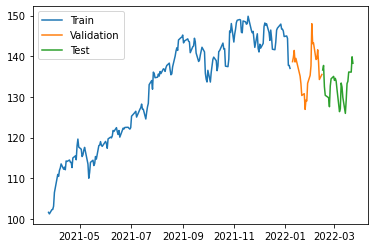

In [18]:
#data visualization
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test']);

In [19]:
#model building
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 5s 158ms/step - loss: 17551.6973 - mean_absolute_error: 131.8377 - val_loss: 18652.3320 - val_mean_absolute_error: 136.4826
Epoch 2/100
7/7 [==============================] - 0s 22ms/step - loss: 17453.1484 - mean_absolute_error: 131.4638 - val_loss: 18557.9316 - val_mean_absolute_error: 136.1363
Epoch 3/100
7/7 [==============================] - 0s 12ms/step - loss: 17354.5859 - mean_absolute_error: 131.0878 - val_loss: 18439.5234 - val_mean_absolute_error: 135.7007
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 17230.8770 - mean_absolute_error: 130.6125 - val_loss: 18293.1309 - val_mean_absolute_error: 135.1602
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 17071.9199 - mean_absolute_error: 130.0041 - val_loss: 18089.5039 - val_mean_absolute_error: 134.4048
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 16842.0254 - mean_absolute_error: 129.1183 - val_loss: 17

7/7 [==============================] - 0s 8ms/step - loss: 4.2543 - mean_absolute_error: 1.6447 - val_loss: 11.2621 - val_mean_absolute_error: 2.5712
Epoch 100/100
7/7 [==============================] - 0s 22ms/step - loss: 3.8939 - mean_absolute_error: 1.5509 - val_loss: 11.7539 - val_mean_absolute_error: 2.6298


7/7 [==============================] - 0s 3ms/step


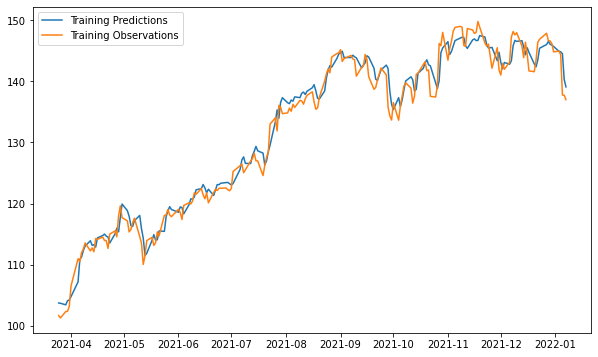

In [20]:
train_predictions = model.predict(X_train).flatten()

fig = plt.figure(figsize=(10, 6))

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations']);

1/1 [==============================] - 0s 24ms/step


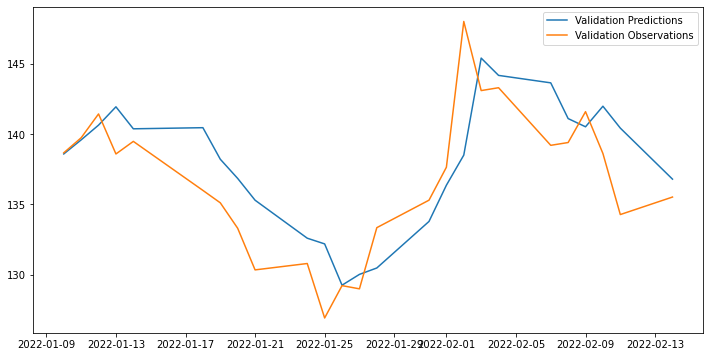

In [21]:
val_predictions = model.predict(X_val).flatten()

fig = plt.figure(figsize=(12, 6))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 30ms/step


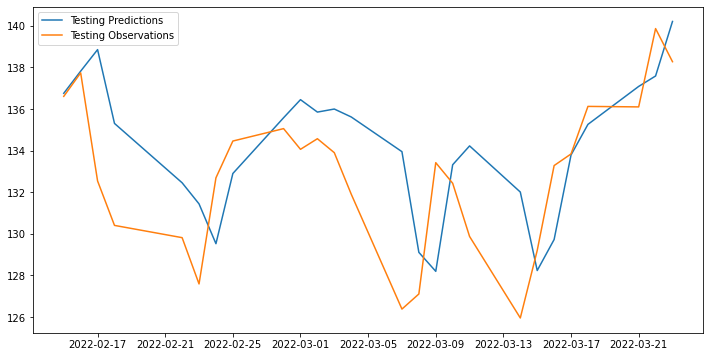

In [22]:
test_predictions = model.predict(X_test).flatten()
fig = plt.figure(figsize=(12, 6))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations']);

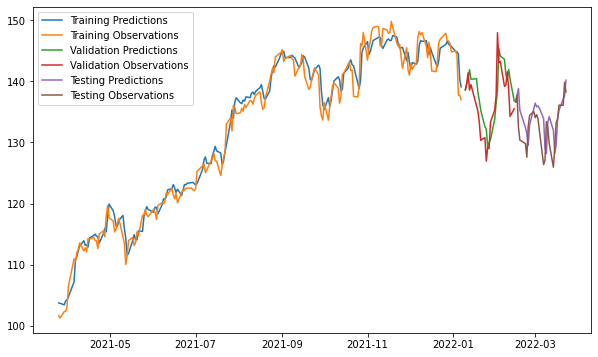

In [23]:
fig = plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])


In [24]:
#model optimization
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 39ms/step


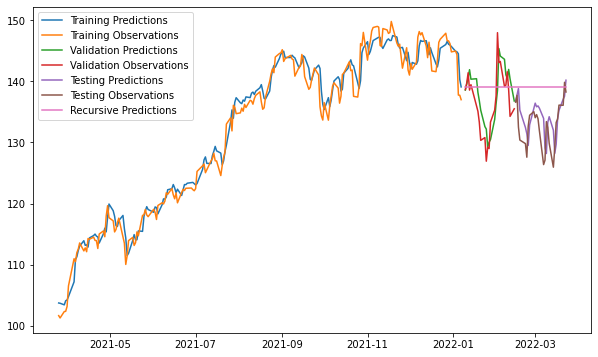

In [25]:
fig = plt.figure(figsize=(10, 6))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions']);